In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings(action = 'ignore')

In [5]:
pd.set_option('display.max_columns',35)

In [7]:
ad_dong_df = pd.read_csv("행정동_컬럼추가_최종ver.csv",index_col=0)
ad_dong_df.rename(columns={"인구수" : "MZ_POP_CNT"},inplace=True)
ad_dong_df

,GU,DONG,DONG_CODE,ACADEMY_NUM,KINDER_NUM,FIRE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,CCTV_NUM,POLICE_NUM,BIKE_NUM,CAR_SHR_NUM,SUBWAY_NUM,SAFE_DLVR_NUM,DPTM_NUM,ANI_HSPT_NUM,PHARM_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,CON_NUM,NOISE_VIBRATION_NUM,CHILD_MED_NUM,CAFE_NUM,PARK_NUM,HOSPITAL_NUM,BUS_CNT,RETAIL_NUM,COLIVING_NUM,MZ_POP_CNT
0,종로구,청운효자동,1111051500,18.000000,0.000000,1.0,2.000000,2.000000,3.0,56.666667,2.000000,5.666667,1.000000,0.333333,1.000000,0.0,2.000000,4.333333,1.000000,0.000000,0.0,0.0,0.000000,0.333333,0.0,4.000000,18816.000000,7.333333,39.666667,1.666667,11.666667,14.0,0.000000,0.0,3210
1,종로구,사직동,1111053000,19.000000,10.000000,0.0,2.000000,0.000000,0.0,41.666667,3.000000,11.666667,5.000000,1.333333,0.000000,0.0,1.000000,17.333333,1.000000,0.000000,0.0,18.0,3.000000,7.333333,0.0,20.000000,22848.000000,10.333333,100.666667,2.666667,74.666667,16.0,2.000000,1.0,2749
2,종로구,삼청동,1111054000,2.000000,10.000000,0.0,0.000000,1.000000,1.0,22.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.0,2.000000,14112.000000,1.000000,52.000000,1.000000,7.000000,11.0,0.000000,0.0,684
3,종로구,부암동,1111055000,24.000000,0.000000,1.0,4.000000,1.000000,1.0,41.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.0,3.000000,1.000000,0.000000,0.000000,0.0,2.0,2.000000,0.000000,0.0,8.000000,6048.000000,5.000000,30.000000,1.000000,4.000000,9.0,0.000000,0.0,2585
4,종로구,평창동,1111056000,28.000000,0.000000,0.0,0.000000,0.000000,1.0,21.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.0,5.0,5.000000,1.000000,0.0,6.000000,4032.000000,10.000000,36.000000,0.000000,14.000000,37.0,0.000000,0.0,4597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,11.0,3.333333,0.0,8130
422,강동구,성내3동,1174066000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,9.0,3.333333,0.0,7120
423,강동구,길동,1174068500,100.000000,20.000000,1.0,6.000000,1.000000,0.0,119.000000,0.000000,9.000000,10.000000,1.000000,1.000000,0.0,8.000000,35.000000,3.000000,1.000000,0.0,18.0,9.000000,2.000000,0.0,76.000000,4327.000000,10.000000,63.000000,1.000000,120.000000,28.0,8.000000,0.0,14486
424,강동구,둔촌1동,1174069000,38.000000,0.000000,0.0,2.000000,1.500000,1.0,32.500000,1.000000,5.500000,2.000000,0.500000,0.000000,0.0,1.500000,10.000000,0.000000,0.000000,0.0,4.0,3.000000,0.000000,0.5,17.000000,2163.500000,0.000000,17.500000,1.000000,14.500000,4.0,0.000000,0.0,33


In [29]:
ad_dong_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'RETAIL_NUM', 'COLIVING_NUM', 'MZ_POP_CNT'],
      dtype='object')

In [8]:
tmp_df = ad_dong_df.copy()

In [9]:
# 피쳐합

# 교통
tmp_df['교통'] =tmp_df['SUBWAY_NUM'] + 0.93*tmp_df['BUS_CNT']+0.06*tmp_df['BIKE_NUM']
tmp_df = tmp_df.drop(['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],axis=1)

# 교육
tmp_df['교육'] =(0.07)*tmp_df['MID_SCH_NUM'] + (0.03)*tmp_df['HIGH_SCH_NUM']+tmp_df['ACADEMY_NUM'] + (0.9)*tmp_df['ELE_SCH_NUM']
tmp_df = tmp_df.drop(['MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM','ELE_SCH_NUM'],axis=1)

# 육아
tmp_df['육아'] =  tmp_df['CHILD_MED_NUM']+ tmp_df['KINDER_NUM']
tmp_df = tmp_df.drop(['CHILD_MED_NUM','KINDER_NUM'],axis=1)

# 치안
tmp_df['치안'] = tmp_df['POLICE_NUM']+tmp_df['CCTV_NUM']+tmp_df['FIRE_NUM']
tmp_df = tmp_df.drop(['POLICE_NUM','CCTV_NUM','FIRE_NUM'],axis=1)

# 건강
tmp_df['건강'] =(0.94)*tmp_df['HOSPITAL_NUM'] + tmp_df['PHARM_NUM']
tmp_df = tmp_df.drop(['HOSPITAL_NUM','PHARM_NUM'],axis=1)

# 편의시설
tmp_df['편의시설'] =0.04*tmp_df['DPTM_NUM'] + 0.44 * tmp_df['CON_NUM'] + 0.25 * tmp_df['CAFE_NUM'] + 0.27 * tmp_df['RETAIL_NUM']
tmp_df = tmp_df.drop(['DPTM_NUM','CON_NUM','CAFE_NUM','RETAIL_NUM'],axis=1)

In [10]:
tmp_df.set_index('DONG_CODE',inplace=True)

### 행정동 개수 기반으로 기본 클러스터링

In [11]:

data = tmp_df.drop(['GU','DONG'],axis=1)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(data)

basic_df = tmp_df.copy()
basic_df['km_cluster'] = kmeans.labels_
basic_df.groupby('km_cluster').count()

,GU,DONG,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설
km_cluster,,,,,,,,,,,,,,,,,,,,,,
0,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274
1,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
2,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123


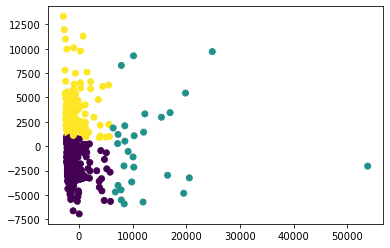

In [12]:
from sklearn.decomposition import PCA

basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(data)

basic_df['pca_x']=basic_pca_transformed[:,0]
basic_df['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=basic_df.loc[:,'pca_x'], y=basic_df.loc[:,'pca_y'],c=basic_df['km_cluster'])

### 소음 수치 이상
- 카테고리화 또는 스케일링 필요 -> 이상치 제거 해야함

In [13]:
basic_df[50000 < basic_df['pca_x']]

,GU,DONG,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1111061500,종로구,종로1.2.3.4가동,18.0,0.0,0.0,4.0,1.0,0.0,10.0,5.0,13.333333,1.0,56112.0,1.666667,3.0,2370,50.663333,105.1,70.333333,85.666667,192.66,89.851667,1,53817.879903,-2039.252176


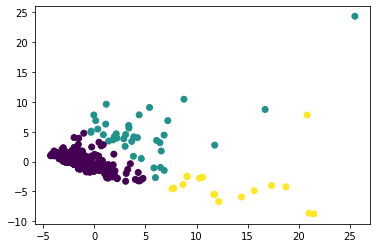

In [15]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

robust_scaler.fit(data)

robust_data = robust_scaler.transform(data)

# density_data = minmax_norm(density_data)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(robust_data)

robust_df = tmp_df.copy()
robust_df['km_cluster'] = kmeans.labels_


basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(robust_data)

robust_df['pca_x']=basic_pca_transformed[:,0]
robust_df['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=robust_df.loc[:,'pca_x'], y=robust_df.loc[:,'pca_y'],c=robust_df['km_cluster'])

In [17]:
robust_df[25 < robust_df['pca_x']]

,GU,DONG,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1111061500,종로구,종로1.2.3.4가동,18.0,0.0,0.0,4.0,1.0,0.0,10.0,5.0,13.333333,1.0,56112.0,1.666667,3.0,2370,50.663333,105.1,70.333333,85.666667,192.66,89.851667,1,25.519988,24.346573


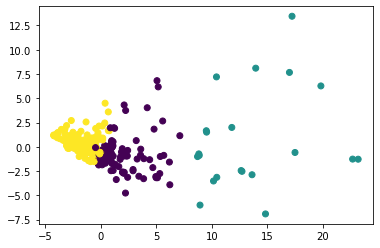

In [18]:
noise_rv_df = tmp_df.copy()
noise_rv_df['NOISE_VIBRATION_NUM'] = np.where(noise_rv_df['NOISE_VIBRATION_NUM'] <500, 4,(np.where(noise_rv_df['NOISE_VIBRATION_NUM']<=1000, 3,(np.where(noise_rv_df['NOISE_VIBRATION_NUM']<=1500,2,1)))))
data = noise_rv_df.drop(['GU','DONG'],axis=1)

robust_scaler = RobustScaler()

robust_scaler.fit(data)

robust_data = robust_scaler.transform(data)

# density_data = minmax_norm(density_data)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(robust_data)

robust_df = noise_rv_df.copy()
robust_df['km_cluster'] = kmeans.labels_


basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(robust_data)

robust_df['pca_x']=basic_pca_transformed[:,0]
robust_df['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=robust_df.loc[:,'pca_x'], y=robust_df.loc[:,'pca_y'],c=robust_df['km_cluster'])

### 역삼1동, 역삼2동
- 병원이 많은 동네 -> 스케일링 필요.
- 상위 2%를 최대값으로 조정

In [19]:
robust_df[20 < robust_df['pca_x']]

,GU,DONG,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1168064000,강남구,역삼1동,19.0,1.0,7.5,5.5,1.0,0.0,45.0,32.5,12.0,1.0,1,0.0,3.0,18216,28.73,195.885,37.0,216.0,289.7,135.775,1,23.175666,-1.279070
1168065000,강남구,역삼2동,19.0,1.0,7.5,5.5,1.0,0.0,45.0,32.5,12.0,1.0,1,0.0,0.0,9373,16.64,195.885,37.0,216.0,289.7,135.775,1,22.677351,-1.267936


### 면적으로 나누기
- 동별로 사이즈가 다르기때문에, 절대개수가 아닌 면적당 개수로 변환

In [168]:
density_df = pd.read_excel('인구밀도.xlsx')

In [169]:
# 행정동 데이터, 밀도 데이터 병합
tmp = pd.merge(ad_dong_df, density_df)

# 컬럼 순서 정렬
tmp = tmp[['GU', 'DONG', 'DONG_CODE', 'AREA', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'RETAIL_NUM', 'COLIVING_NUM', 'MZ_POP_CNT']]


In [170]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [171]:
# 피쳐합
tmp_df = tmp.copy()
# 교통
tmp_df['교통'] =tmp_df['SUBWAY_NUM'] + 0.93*tmp_df['BUS_CNT']+0.06*tmp_df['BIKE_NUM']
tmp_df = tmp_df.drop(['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],axis=1)

# 교육
tmp_df['교육'] =(0.07)*tmp_df['MID_SCH_NUM'] + (0.03)*tmp_df['HIGH_SCH_NUM']+tmp_df['ACADEMY_NUM'] + (0.9)*tmp_df['ELE_SCH_NUM']
tmp_df = tmp_df.drop(['MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM','ELE_SCH_NUM'],axis=1)

# 육아
tmp_df['육아'] =  tmp_df['CHILD_MED_NUM']+ tmp_df['KINDER_NUM']
tmp_df = tmp_df.drop(['CHILD_MED_NUM','KINDER_NUM'],axis=1)

# 치안
tmp_df['치안'] = tmp_df['POLICE_NUM']+tmp_df['CCTV_NUM']+tmp_df['FIRE_NUM']
tmp_df = tmp_df.drop(['POLICE_NUM','CCTV_NUM','FIRE_NUM'],axis=1)

# 건강
tmp_df['건강'] =(0.94)*tmp_df['HOSPITAL_NUM'] + tmp_df['PHARM_NUM']
tmp_df = tmp_df.drop(['HOSPITAL_NUM','PHARM_NUM'],axis=1)

# 편의시설
tmp_df['편의시설'] =0.04*tmp_df['DPTM_NUM'] + 0.44 * tmp_df['CON_NUM'] + 0.25 * tmp_df['CAFE_NUM'] + 0.27 * tmp_df['RETAIL_NUM']
tmp_df = tmp_df.drop(['DPTM_NUM','CON_NUM','CAFE_NUM','RETAIL_NUM'],axis=1)

In [172]:
tmp_df.set_index('DONG_CODE',inplace=True)

In [173]:
tmp_data = tmp_df.iloc[:,3:]
density_data = tmp_data.div(tmp_df['AREA'], axis=0)

In [174]:
density_data['NOISE_VIBRATION_NUM'] = np.where(density_data['NOISE_VIBRATION_NUM'] <500, 4,(np.where(density_data['NOISE_VIBRATION_NUM']<=1000, 3,(np.where(density_data['NOISE_VIBRATION_NUM']<=1500,2,1)))))
density_data['STARBUCKS_NUM'] = np.log1p(density_data['STARBUCKS_NUM'])

In [175]:
health_quan = density_data['건강'].quantile(0.80)

In [176]:
density_data['건강'] =  np.where(density_data['건강'] > health_quan,health_quan,density_data['건강'])
density_data['건강'] = np.log1p(density_data['건강'])

49.46700044121973


<AxesSubplot:>

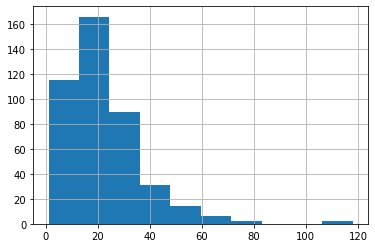

In [177]:
con_quan = density_data['편의시설'].quantile(0.95)
print(con_quan)
density_data['편의시설'].hist()

In [178]:
density_data['편의시설'] =  np.where(density_data['편의시설'] > con_quan,con_quan,density_data['편의시설'])
density_data['편의시설'] = np.log1p(density_data['편의시설'])

148.35303495512517


<AxesSubplot:>

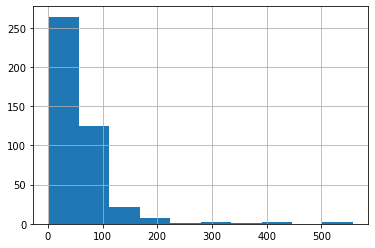

In [179]:
edu_quan = density_data['교육'].quantile(0.95)
print(edu_quan)
density_data['교육'].hist()

In [180]:
density_data['교육'] =  np.where(density_data['교육'] > edu_quan,edu_quan,density_data['교육'])
density_data['교육'] = np.log1p(density_data['교육'])

9.501347708894876


<AxesSubplot:>

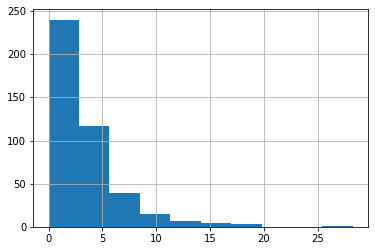

In [181]:
golf_quan = density_data['GOLF_NUM'].quantile(0.95)
print(golf_quan)
density_data['GOLF_NUM'].hist()

In [182]:
density_data['GOLF_NUM'] =  np.where(density_data['GOLF_NUM'] > golf_quan,golf_quan,density_data['GOLF_NUM'])
density_data['GOLF_NUM'] = np.log1p(density_data['GOLF_NUM'])

29.322401908801698


<AxesSubplot:>

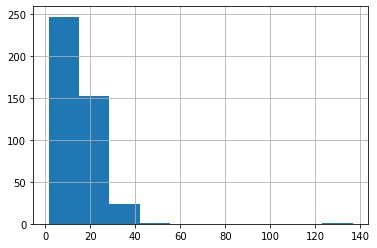

In [183]:
traffic_quan = density_data['교통'].quantile(0.95)
print(traffic_quan)
density_data['교통'].hist()

In [184]:
density_data['교통'] =  np.where(density_data['교통'] > traffic_quan,traffic_quan,density_data['교통'])
density_data['교통'] = np.log1p(density_data['교통'])

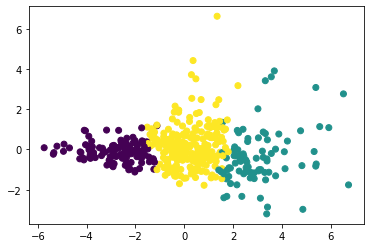

In [185]:

robust_scaler = RobustScaler()

robust_scaler.fit(density_data)

robust_data = robust_scaler.transform(density_data)

# density_data = minmax_norm(density_data)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=400,random_state=0)
kmeans.fit(robust_data)

basic_df = tmp_df.copy()
basic_df['km_cluster'] = kmeans.labels_

from sklearn.decomposition import PCA

basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(robust_data)

basic_df['pca_x']=basic_pca_transformed[:,0]
basic_df['pca_y']=basic_pca_transformed[:,1]

plt.scatter(x=basic_df.loc[:,'pca_x'], y=basic_df.loc[:,'pca_y'],c=basic_df['km_cluster'])


In [190]:
basic_df[basic_df['pca_x'] > 5]

,GU,DONG,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
1114067000,중구,황학동,0.33,2.000000,0.000000,3.000000,4.000000,1.000000,6.000000,3.000000,1.000000,0.0,1060.000000,0.000000,0.0,5397,5.640000,3.000000,27.000000,60.000000,31.620000,13.910000,1,5.926228,1.084893
1129062000,성북구,정릉1동,0.44,5.083333,0.583333,2.666667,0.333333,1.000000,6.000000,4.000000,0.833333,0.0,1337.250000,0.583333,0.0,4878,12.413333,105.851667,49.583333,113.916667,54.328333,25.689167,1,5.393301,3.080270
1144066000,마포구,서교동,1.65,24.000000,3.500000,9.500000,15.000000,1.000000,39.500000,4.000000,8.500000,1.0,8267.500000,0.000000,3.0,12978,43.850000,216.270000,17.500000,127.000000,198.500000,111.575000,1,5.389839,-0.829726
1147053000,양천구,목3동,0.53,5.200000,0.800000,4.200000,1.600000,1.000000,13.200000,5.000000,2.000000,0.2,244.600000,0.400000,0.0,7284,9.510000,213.388000,51.600000,35.800000,68.344000,21.578000,1,5.409635,-0.722679
1153055000,구로구,구로4동,0.46,7.800000,1.200000,1.400000,2.000000,0.400000,7.800000,4.000000,1.200000,0.2,387.000000,0.000000,0.0,6501,13.534000,38.000000,71.200000,147.800000,61.520000,29.254000,1,6.525598,2.762761
1156053500,영등포구,영등포동,1.26,11.000000,1.000000,5.500000,12.000000,3.500000,14.000000,4.000000,8.000000,1.0,27744.000000,1.500000,1.0,15481,20.350000,77.735000,131.000000,165.500000,157.330000,82.175000,1,5.553618,1.135452
1162054500,관악구,청림동,0.30,3.888889,0.555556,1.666667,0.555556,0.333333,7.888889,2.888889,0.777778,0.0,282.444444,0.000000,0.0,4347,6.226667,43.087778,37.666667,37.222222,48.920000,21.003333,1,5.324008,-0.103661
1168065000,강남구,역삼2동,1.15,19.000000,1.000000,7.500000,5.500000,1.000000,45.000000,32.500000,12.000000,1.0,3759.000000,0.000000,0.0,9373,16.640000,195.885000,37.000000,216.000000,289.700000,135.775000,1,6.733902,-1.761298


In [143]:
basic_df.describe()

,AREA,CAR_SHR_NUM,SAFE_DLVR_NUM,ANI_HSPT_NUM,LEISURE_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,PARK_NUM,COLIVING_NUM,MZ_POP_CNT,교통,교육,육아,치안,건강,편의시설,km_cluster,pca_x,pca_y
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,4.260000e+02,4.260000e+02
mean,1.420728,4.133803,0.622066,2.093897,1.194836,0.518779,7.448357,3.626761,1.302817,0.204225,2452.551643,0.309859,0.178404,6970.138498,15.812629,60.386103,35.896714,54.546948,51.924836,22.293099,1.265258,-1.720064e-16,1.356505e-16
std,1.571263,3.156750,0.503566,1.393441,1.606980,0.656479,7.034213,4.318573,2.164240,0.363035,4534.820198,0.457164,0.590994,3195.571959,9.637535,56.739196,25.925220,41.269881,39.557260,17.783109,0.869112,2.249184e+00,1.171718e+00
min,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,33.000000,2.070000,1.000000,0.000000,4.333333,1.940000,1.431667,0.000000,-5.454298e+00,-5.690739e+00
25%,0.670000,2.285714,0.000000,1.350000,0.000000,0.000000,3.500000,1.333333,0.333333,0.000000,442.037500,0.000000,0.000000,4710.250000,9.540000,28.970000,16.750000,26.589286,31.060000,13.440833,0.000000,-1.536172e+00,-5.994596e-01
50%,0.970000,3.500000,0.666667,2.000000,0.833333,0.333333,6.000000,2.500000,0.666667,0.000000,1014.000000,0.142857,0.000000,6607.000000,13.497000,44.300000,30.333333,42.750000,43.096667,17.945000,2.000000,-2.164065e-02,3.939201e-02
75%,1.487500,5.000000,1.000000,2.500000,1.750000,0.729167,9.000000,4.500000,1.333333,0.285714,2163.500000,0.500000,0.000000,8666.500000,19.942500,73.250000,48.187500,67.075000,59.130000,23.131500,2.000000,1.312926e+00,5.773953e-01
max,12.680000,24.000000,3.500000,12.000000,15.000000,4.250000,60.000000,32.500000,18.500000,4.000000,56112.000000,3.000000,4.000000,20429.000000,73.811818,486.355000,207.000000,252.500000,289.700000,135.775000,2.000000,8.993206e+00,7.465038e+00


<AxesSubplot:>

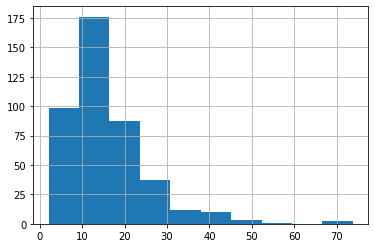

In [166]:
basic_df['교통'].hist()

<AxesSubplot:>

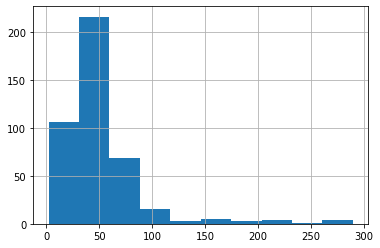

In [24]:
noise_rv_df['건강'].hist()

In [23]:
noise_rv_df['건강'].quantile(0.98)

202.14999999999998